# <font color='Brown'>***Project Title : Heart Disease Prediction***</font>

**Description**:<font color='Black'>  Our innovative machine learning model aims to revolutionize heart disease prediction by leveraging advanced algorithms to analyze diverse patient data and provide accurate risk assessments. Heart disease remains a leading cause of mortality worldwide, making early detection crucial for effective intervention and prevention.</font>
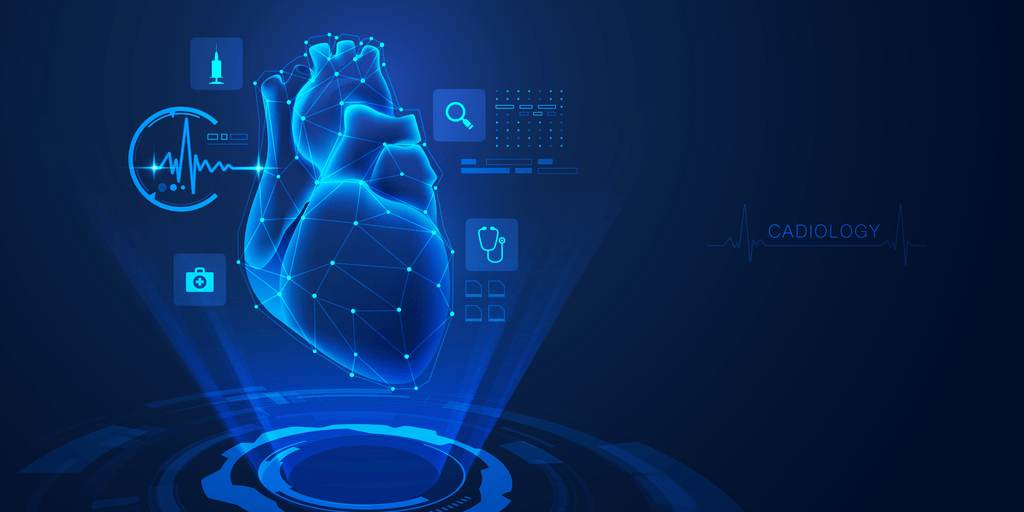

## <font color='Red'> Problem Statement: </font>  
<font color='gray'> Despite significant advancements in medical science, heart disease continues to be a major global health concern, representing a leading cause of morbidity and mortality. Early detection and timely intervention are critical for mitigating the impact of heart-related conditions. Traditional risk assessment methods often rely on a limited set of factors, leading to suboptimal accuracy in predicting individualized risk.The challenge lies in developing a robust and accurate predictive model for heart disease that integrates a diverse range of patient data, including demographic information, medical history, lifestyle factors, and clinical test results.</font>

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# <font color='Brown'>Reading Dataset </font>

In [2]:
df= pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1)age: The person's age in years.

2)sex: The person's sex (1 = male, 0 = female).

3)cp: The chest pain experienced (Value 0: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic).

4)trestbps: The person's resting blood pressure (mm Hg on admission to the hospital).

5)chol: The person's cholesterol measurement in mg/dl.

6)fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false).

7)restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria).

8)thalach: The person's maximum heart rate achieved.

9)exang: Exercise induced angina (1 = yes; 0 = no).

10)oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

11)slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping).

12)ca: The number of major vessels (0-3).

13)thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect).

14)target: Heart disease (0 = no, 1 = yes).

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(303, 14)

**We have 303 Rows and 14 columns in the Dataset.**

In [5]:
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## <font color='Brown'> Checking Null Values</font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we don't have any null values present in our Dataset.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
num_data = df.select_dtypes(include=["float64","int64"])
print("numerical columns",num_data.columns)

numerical columns Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


## EDA (Exploratory Data analysis)

### Univariant Analysis

In [10]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
print(df.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


**This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.**

In [12]:
x = df["target"]

In [13]:
countplot_1 = sns.countplot(x=df["target"])
count= df.target.value_counts()
print(count)

target
1    165
0    138
Name: count, dtype: int64


**From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1).**

## <font color='Red'> How much percentage of people with and without Heart Disease problem in Dataset.</font>

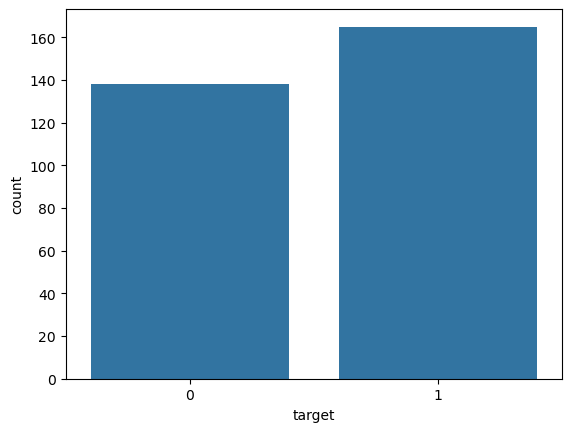

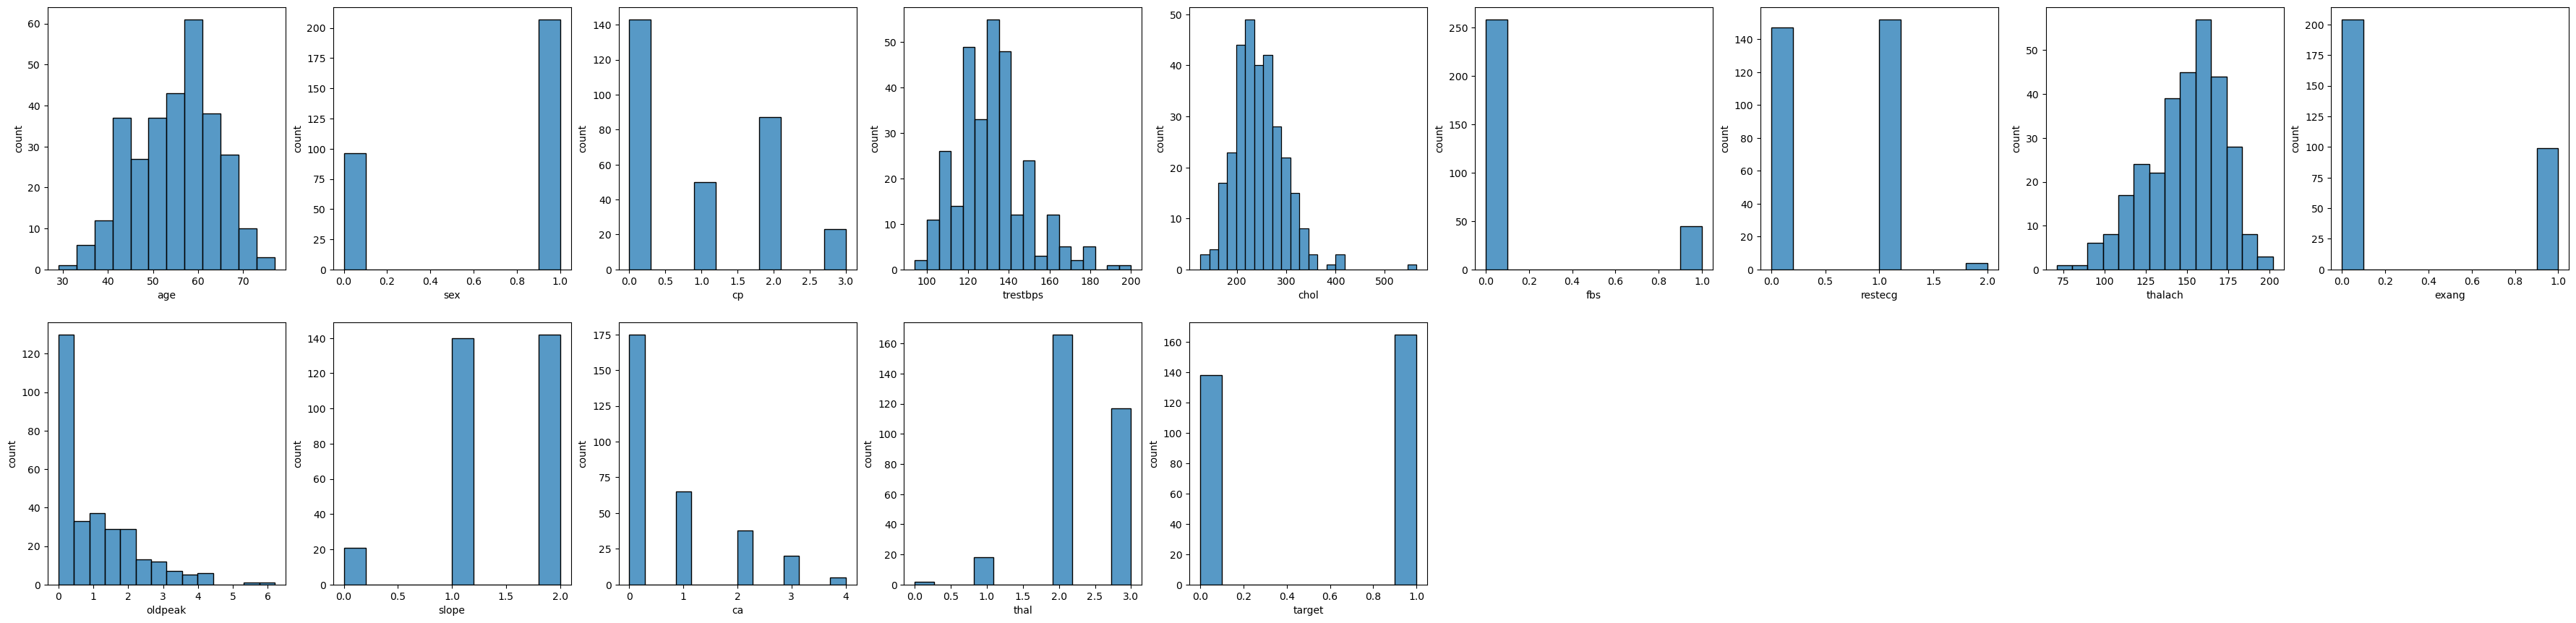

In [14]:
plt.figure(figsize=(45,50),facecolor='white')
plotnumber=1

for column in df:
  if plotnumber<=81:
    ax=plt.subplot(9,9,plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("count",fontsize=10)
  plotnumber+=1
plt.show()

In [15]:
print("Percentage of patience without heart problems: "+str(round(count[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(count[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


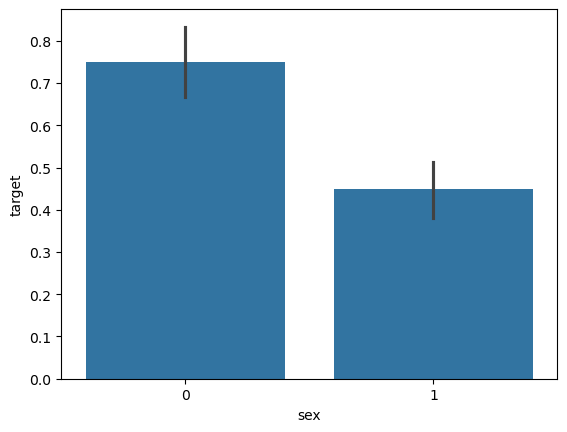

In [16]:
sns.barplot(x="sex",y="target",data=df)
plt.show()

In [17]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(df.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(df.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


## Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease).

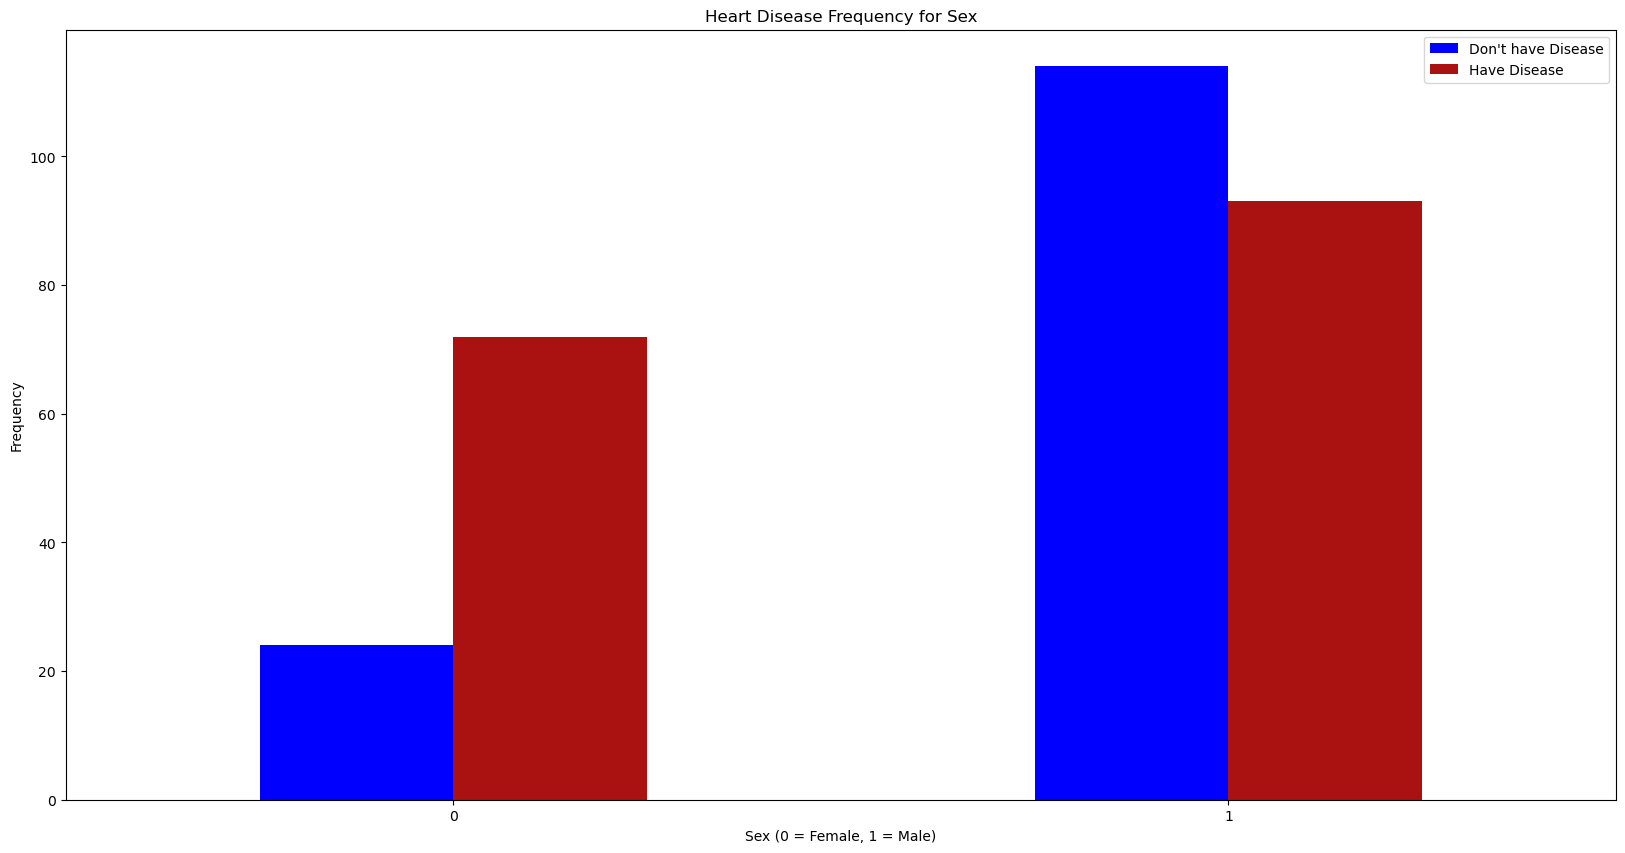

In [18]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## Analysing the chest pain.

In [19]:
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

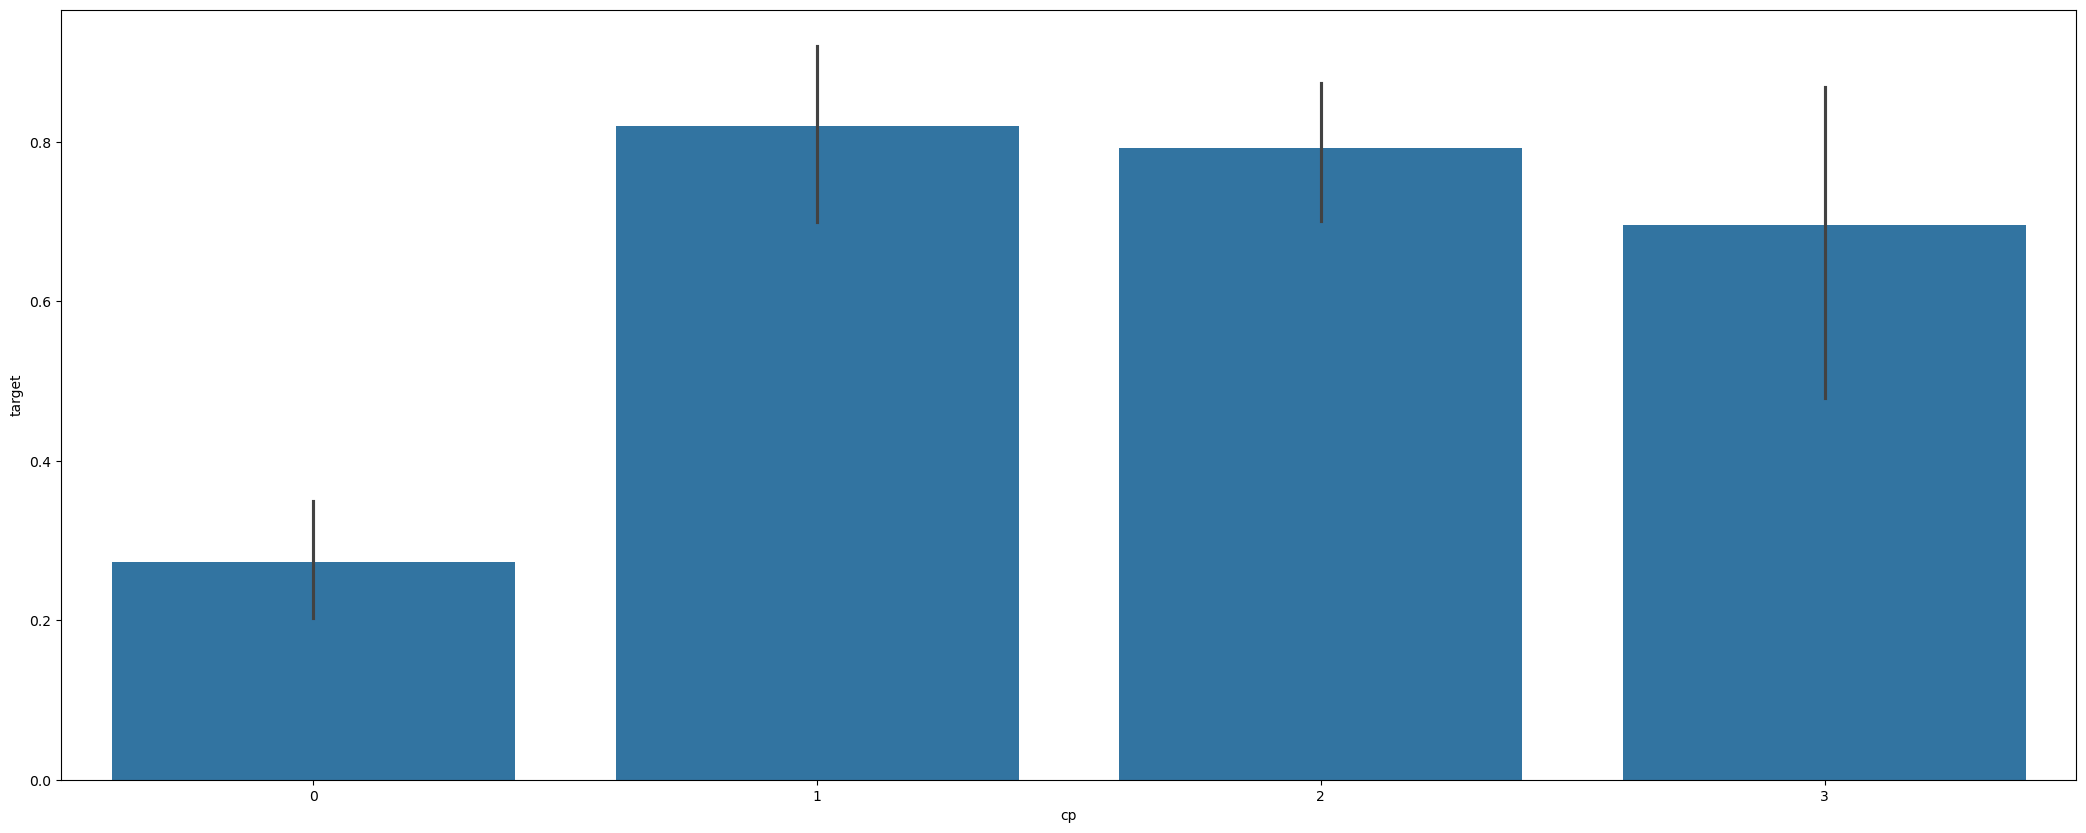

In [20]:
plt.figure(figsize=(26, 10))
sns.barplot(x="cp",y="target",data=df)
plt.show()

## Bivariate Analysis

In [21]:
d1=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]

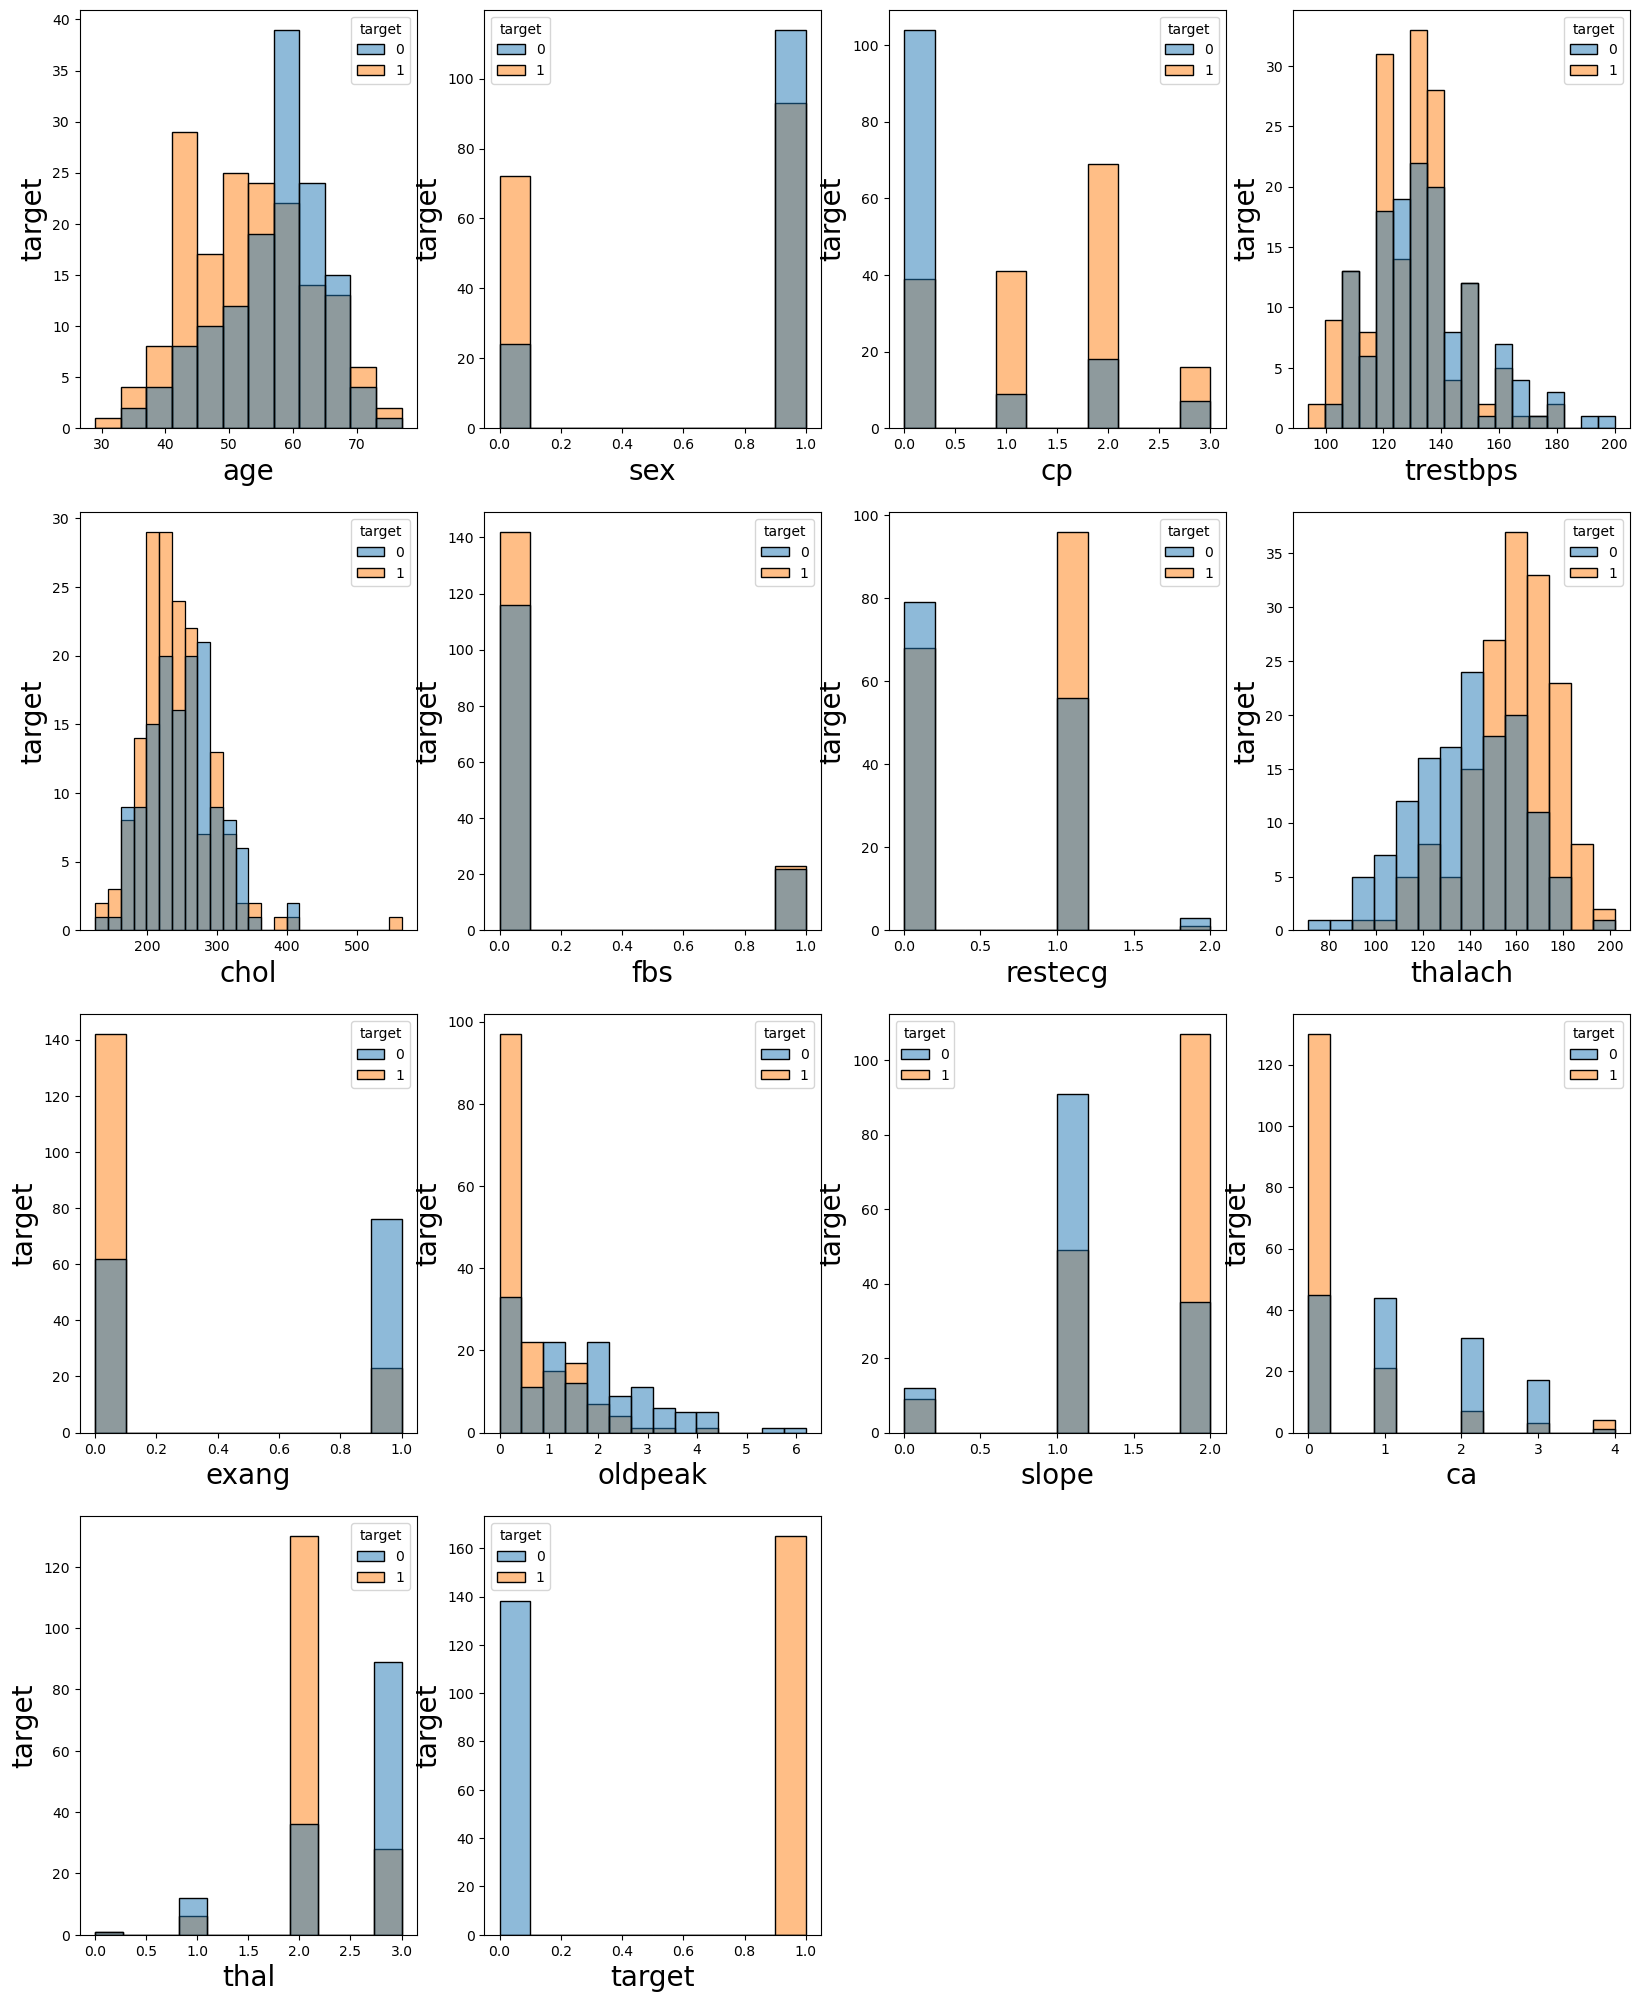

In [22]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=d1[column]         
                        ,hue=df.target)
        plt.xlabel(column,fontsize=20) 
        plt.ylabel('target',fontsize=20) 
    plotnumber+=1
plt.show()

## Check for Outliers

In [23]:
num_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


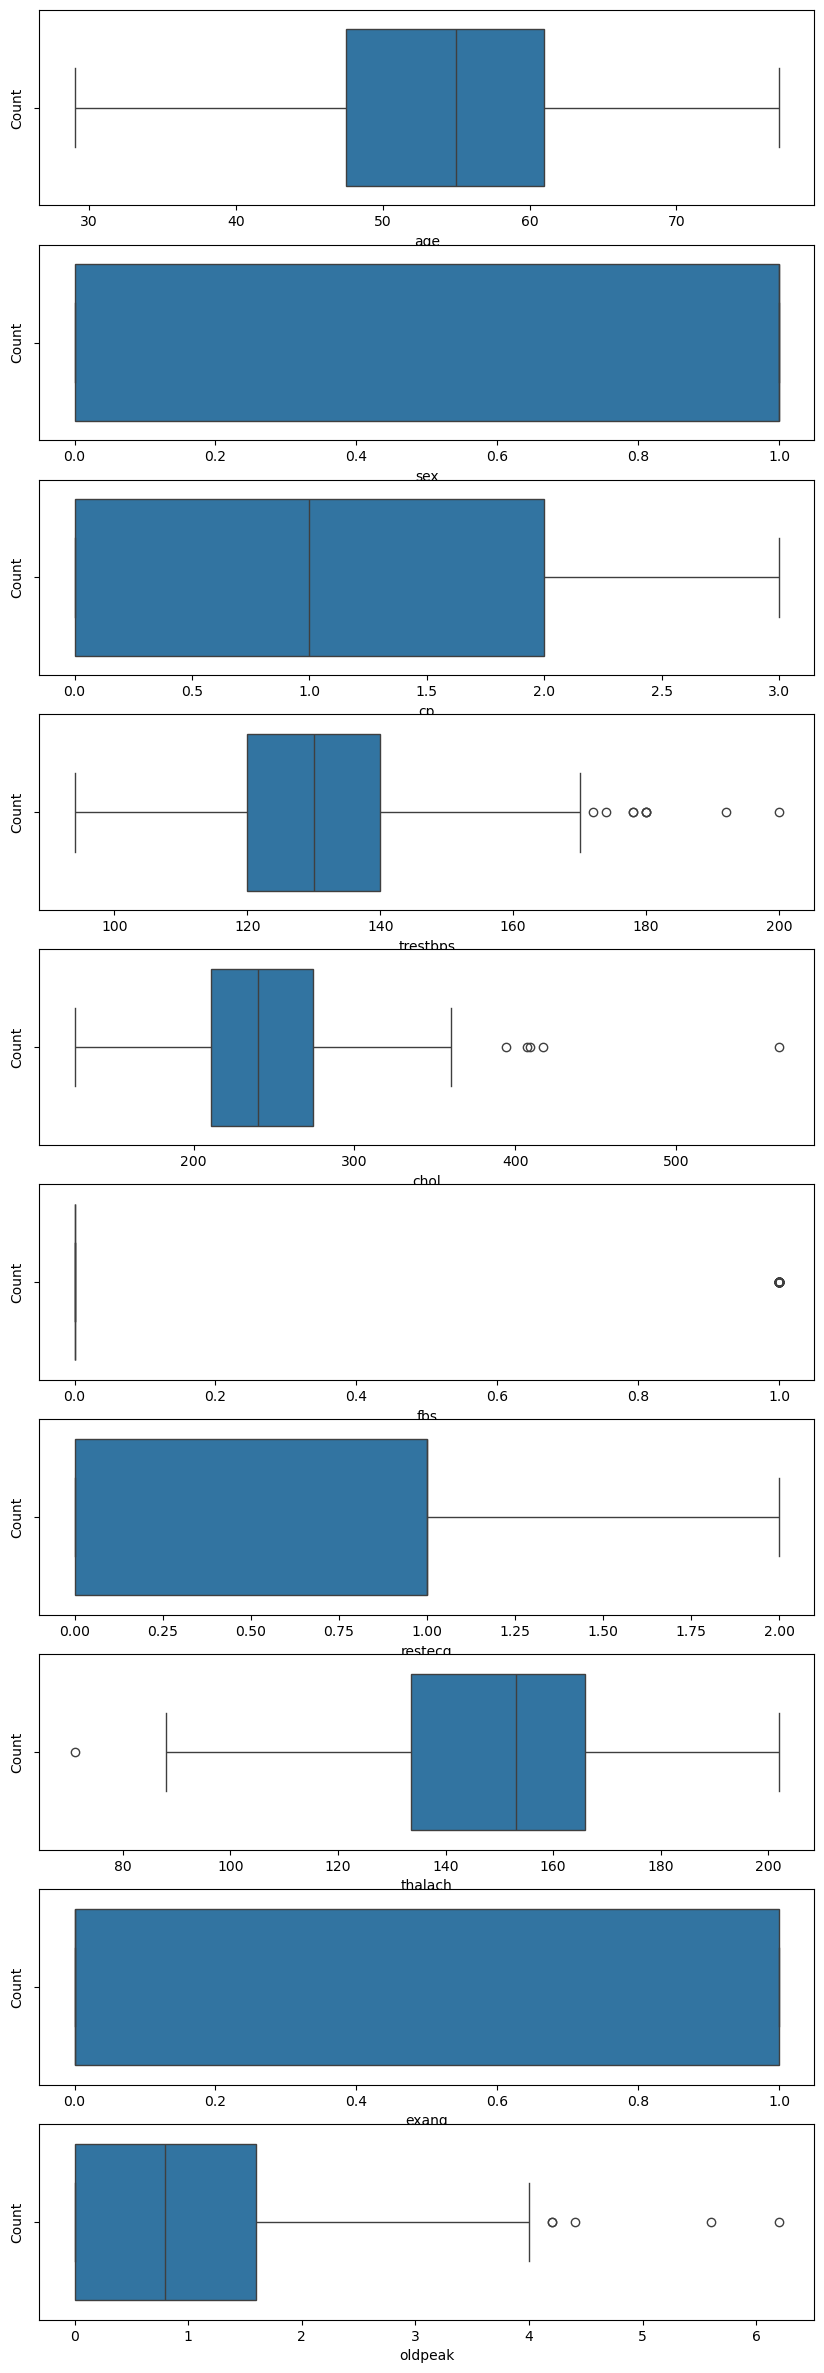

In [24]:
plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1

for column in num_data:
  if plotnumber<=10:
    ax=plt.subplot(10,1,plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Count',fontsize=10)
  plotnumber+=1
plt.show()


### We can see outliers in some columns so we will replace them 

In [25]:
Q1=df['trestbps'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['trestbps'].quantile(0.75)
print("upper quartile",Q3)
IQR=Q3-Q1
print(IQR)

lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

df.loc[df['trestbps']>upper_limit]
df.loc[df['trestbps']<lower_limit]

df.loc[df['trestbps']<lower_limit,"trestbps"] =df["trestbps"].median()
df.loc[df['trestbps']>upper_limit,"trestbps"] =df["trestbps"].median()

lower quartile 120.0
upper quartile 140.0
20.0
lower limit is 90.0
upper_limit is 170.0


In [26]:
Q1=df['chol'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['chol'].quantile(0.75)
print("upper quartile",Q3)
IQR=Q3-Q1
print(IQR)

lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

df.loc[df['chol']>upper_limit]
df.loc[df['chol']<lower_limit]

df.loc[df['chol']<lower_limit,"chol"] =df["chol"].median()
df.loc[df['chol']>upper_limit,"chol"] =df["chol"].median()

lower quartile 211.0
upper quartile 274.5
63.5
lower limit is 115.75
upper_limit is 369.75


In [27]:
Q1=df['thalach'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['thalach'].quantile(0.75)
print("upper quartile",Q3)
IQR=Q3-Q1
print(IQR)

lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

df.loc[df['thalach']>upper_limit]
df.loc[df['thalach']<lower_limit]

df.loc[df['thalach']<lower_limit,"thalach"] =df["thalach"].median()
df.loc[df['thalach']>upper_limit,"thalach"] =df["thalach"].median()

lower quartile 133.5
upper quartile 166.0
32.5
lower limit is 84.75
upper_limit is 214.75


In [28]:
Q1=df['oldpeak'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['oldpeak'].quantile(0.75)
print("upper quartile",Q3)
IQR=Q3-Q1
print(IQR)

lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

df.loc[df['oldpeak']>upper_limit]
df.loc[df['oldpeak']<lower_limit]

df.loc[df['oldpeak']<lower_limit,"oldpeak"] =df["oldpeak"].median()
df.loc[df['oldpeak']>upper_limit,"oldpeak"] =df["oldpeak"].median()

lower quartile 0.0
upper quartile 1.6
1.6
lower limit is -2.4000000000000004
upper_limit is 4.0


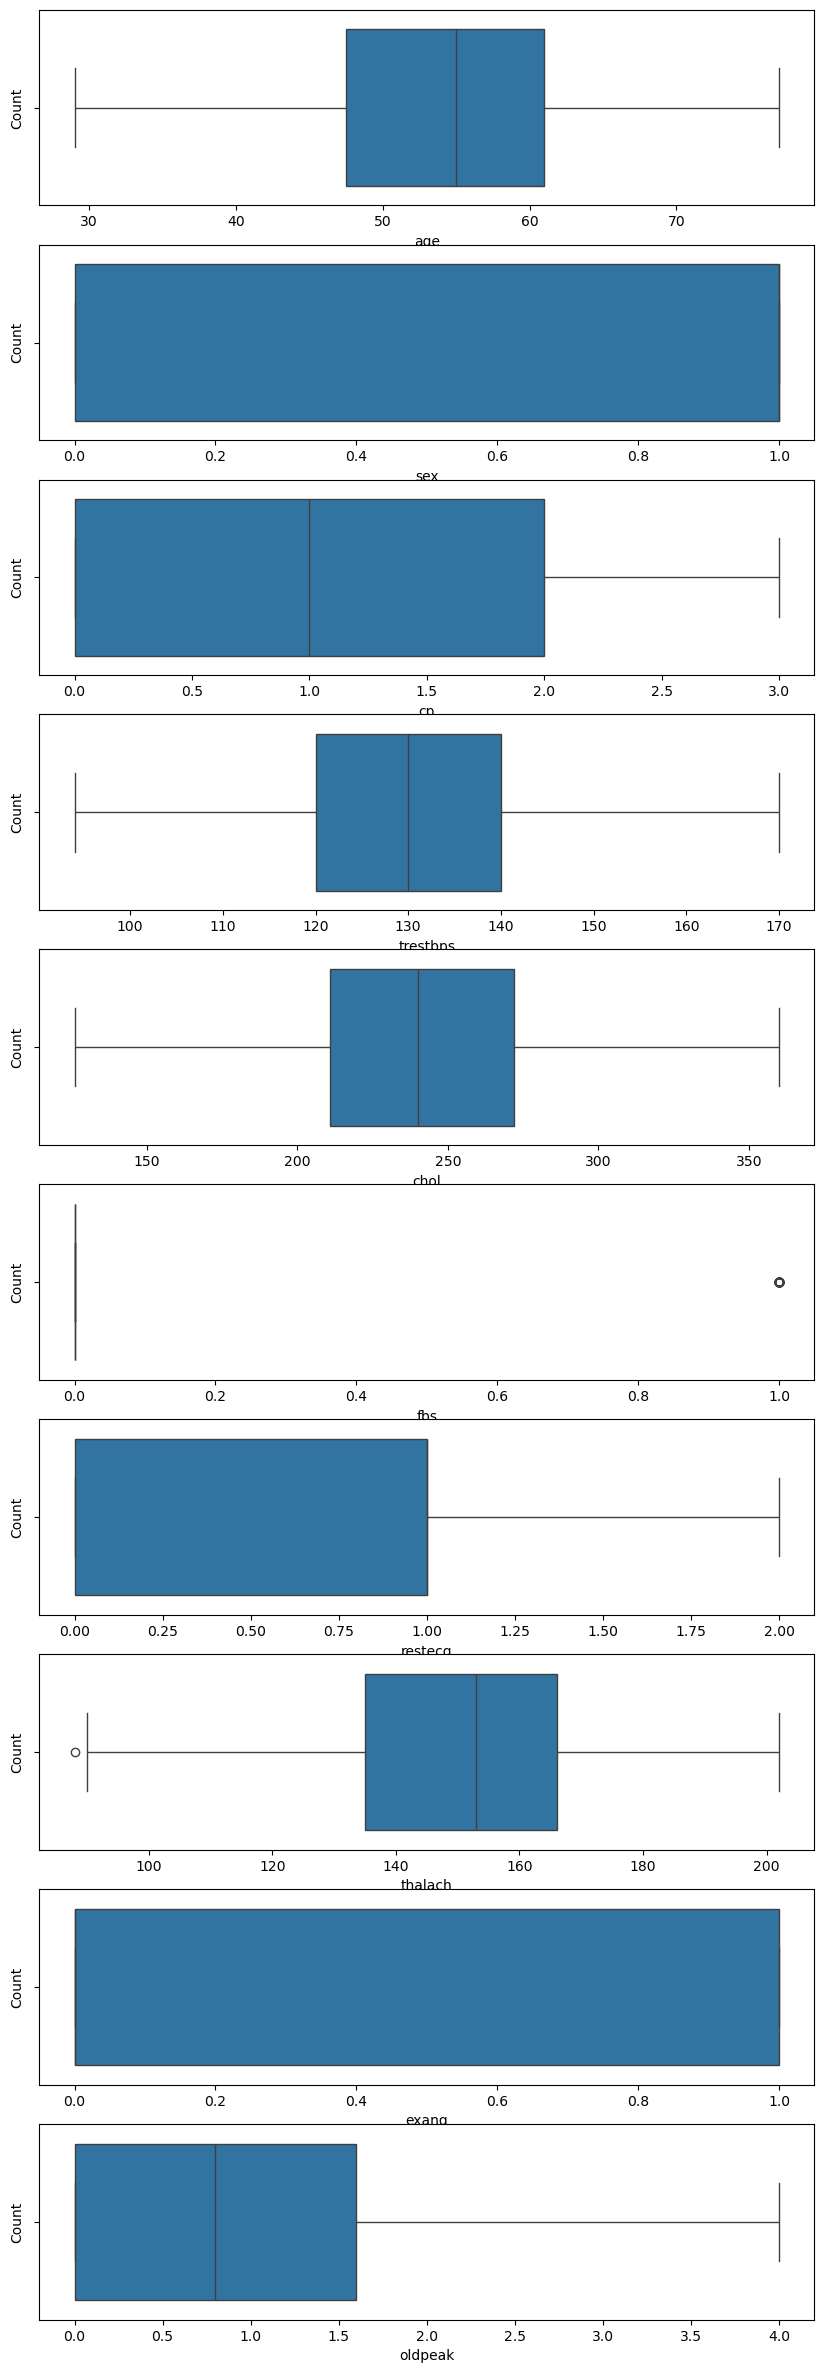

In [29]:
plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1

for column in num_data:
  if plotnumber<=10:
    ax=plt.subplot(10,1,plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Count',fontsize=10)
  plotnumber+=1
plt.show()


### Now there are no more outliers

# Feature Engineering

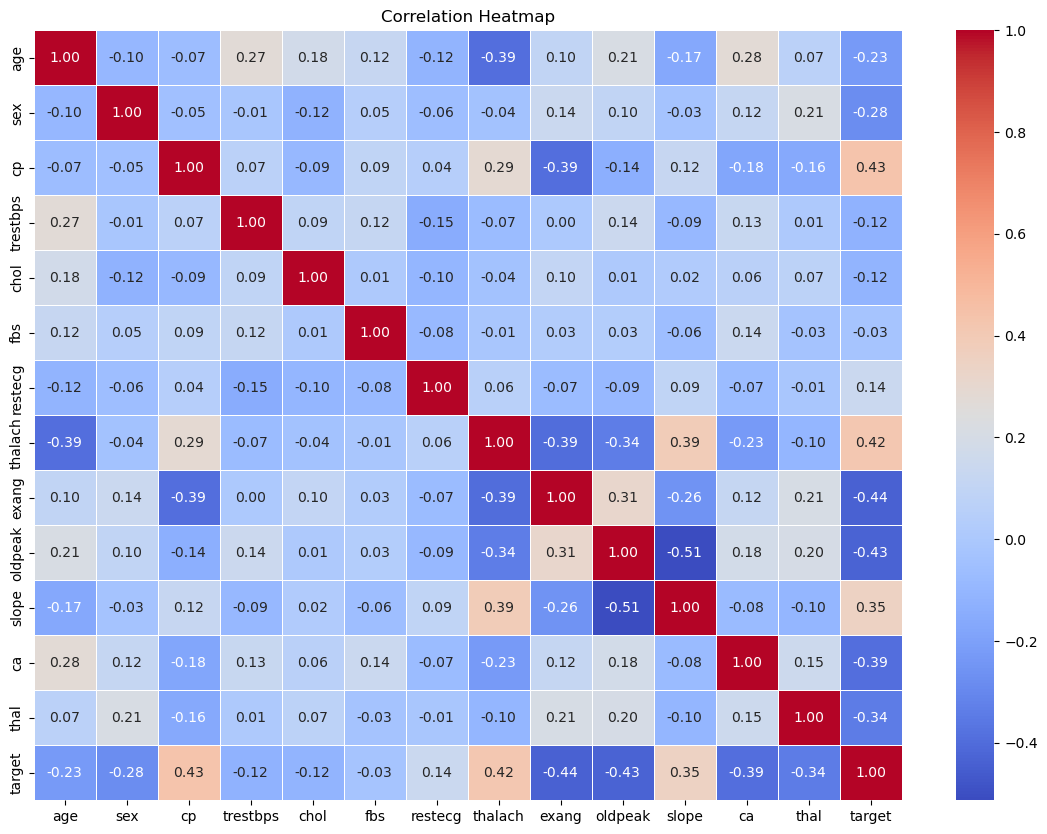

In [30]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Model Building

In [31]:
## Split data into x and y
x = df.drop('target', axis=1)
y = df.target

In [32]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [33]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [34]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,240,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [35]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [36]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [37]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

## Smote is used to balance the data in order to avoid issues like overfitting and underfitting

In [38]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({1: 133, 0: 109})
after smote Counter({1: 133, 0: 133})


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_smote, y_smote)

logistic_regression_pred = logistic_regression_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, logistic_regression_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, logistic_regression_pred)
print("Precision:", precision)

recall = recall_score(y_test, logistic_regression_pred)
print("Recall:", recall)

f1 = f1_score(y_test, logistic_regression_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[25  4]
 [ 4 28]]
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


# Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [41]:
y_train_predict=model.predict(x_train)
y_train_predict

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [42]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

1.0

In [43]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.7868852459016393

## Hyperparameter Tuning with DTC

In [44]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

In [45]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'})


In [46]:
tree_cv.best_score_

0.8085205992509362

In [47]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf= 7,min_samples_split=2,splitter='best')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(x_test)#prediction
y_pred#predicted values 

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_train_predict=model.predict(x_smote)#predicting training data to check training performance 
y_train_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [49]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.8524590163934426

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_smote, y_smote)

random_forest_pred = random_forest_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, random_forest_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, random_forest_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, random_forest_pred)
print("Precision:", precision)

recall = recall_score(y_test, random_forest_pred)
print("Recall:", recall)

f1 = f1_score(y_test, random_forest_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[24  5]
 [ 4 28]]
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384616


## Hyperparameter Tuning with RFC

In [51]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 




In [52]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True})


In [53]:
rf_clf2 = RandomForestClassifier(n_estimators= 1800, min_samples_split=5, min_samples_leaf= 2, max_features='sqrt', max_depth=60, bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [54]:
# testing accuracy
accuracy_score(y_test,y_predict)

0.8524590163934426

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



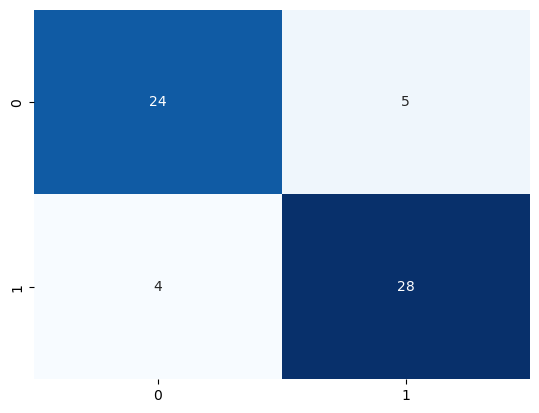

In [57]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.show()

# Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(x_smote, y_smote)

gradient_boosting_pred = gradient_boosting_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, gradient_boosting_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, gradient_boosting_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, gradient_boosting_pred)
print("Precision:", precision)

recall = recall_score(y_test, gradient_boosting_pred)
print("Recall:", recall)

f1 = f1_score(y_test, gradient_boosting_pred)
print("F1 Score:", f1)


Confusion Matrix:
[[23  6]
 [ 9 23]]
Accuracy: 0.7540983606557377
Precision: 0.7931034482758621
Recall: 0.71875
F1 Score: 0.7540983606557377


# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)
accuracy_score(y_test,y_pred)

0.7377049180327869

In [60]:
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_smote,y_smote)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.36065573770491804,
 0.4098360655737705,
 0.36065573770491804,
 0.36065573770491804,
 0.2786885245901639,
 0.26229508196721313,
 0.32786885245901637,
 0.3114754098360656,
 0.32786885245901637,
 0.3114754098360656]

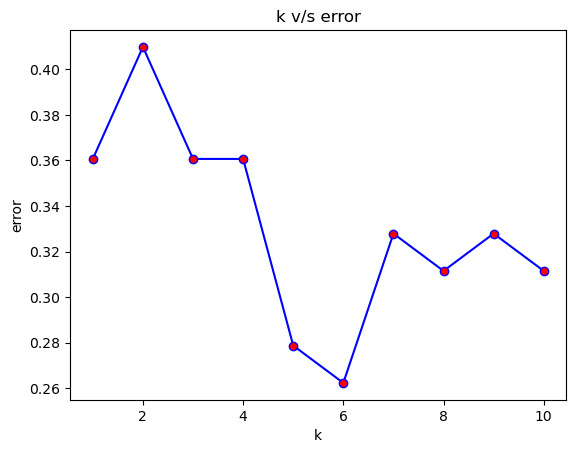

In [61]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")
plt.show()

# Bagging Classifier

In [62]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(estimator=random_forest_model,n_estimators=5)
model_bag.fit(x_smote,y_smote)
y_pred=model_bag.predict(x_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

## Exporting Model ##

In [63]:
steps = [
    ('scaler', StandardScaler()),  # StandardScaler as the first step
    ('random_forest', RandomForestClassifier(
        n_estimators=1800,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features="sqrt",
        max_depth=60,
        bootstrap=True 
    ))  # RandomForestClassifier as the second step
#     ("L",LogisticRegression())
]
pipe1 = Pipeline(steps)

In [64]:
import pickle
pickle.dump(pipe1,open('pipe1.pkl','wb'))

# Conclusion

## It is highly recommended to use Random forest , bagging classifier or logistic regression for the heart disease prediction project 